<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-Lazy-Programmer/blob/main/Tensorflow_LazyProgrammer_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#We'll be proving Moore's Law in the COde of Regression Coding Practice
#C=A*r^t This is exponential Exuation
#By using Log, we can convert it to a Linear Equation
#log(c)=log(r)*t+log(A)

In [2]:
import tensorflow as tf

In [3]:
#other imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
#Get the Data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-06 06:16:06--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-06 06:16:06 (34.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [7]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
#Load in the Data
data=pd.read_csv('moore.csv',header=None).to_numpy()

In [9]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [10]:
X= data[:,0].reshape(-1,1)#-1 is a wildcard which means put whatever's left, i.e. n length of the column. THis makes an N * D matrix

In [11]:
Y=data[:,1]

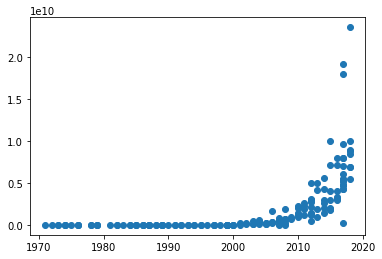

In [13]:
#plot the data
plt.scatter(X,Y);

In [14]:
#We can see that the data grows exponentially

In [15]:
Y=np.log(Y)

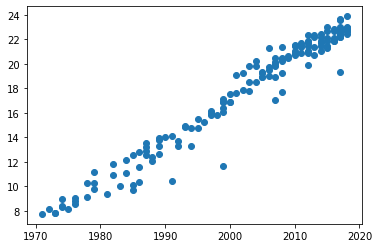

In [16]:
plt.scatter(X,Y)

In [17]:
#Now we get the straight line as now we can use them for linear regression

In [18]:
X=X-X.mean()

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),#Stochastic Gradient Descent. 1st-Learning Rate and 2nd-momentum
    loss='mse'
)# we didn't scale the data so we needed to make use of the custom optimizers instead of ADAM directly

In [23]:
#Learning Rate Scheduler
def schedule(epoch,lr):
  if epoch>=5:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [24]:
r=model.fit(X,Y,epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 331.0909 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 338.1714 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 307.2513 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 196.1068 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 153.6849 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 117.4884 - lr: 1.0000e-04
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 116.6328 - lr: 1.0000e-04
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 94.1387 - lr: 1.0000e-04
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 77.3284 - lr: 1.0000e-04
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 76.1400 - lr: 1.0000e-04
Epoch 11/200
6/6 [==============================] - 

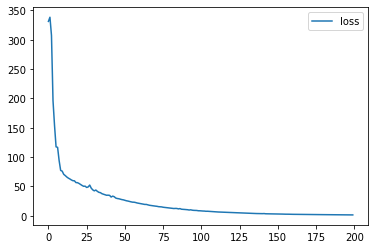

In [27]:
plt.plot(r.history['loss'],label='loss')
plt.legend();

In [28]:
model.layers

In [30]:
model.layers[0].get_weights()

[array([[0.33434236]], dtype=float32), array([16.94434], dtype=float32)]

In [ ]:
###Checkout the mathematical explaination given at the very end of the leacture